<a href="https://colab.research.google.com/github/geo-tp/Keras-Colaboratory-Models/blob/main/boston_housing_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# DATASET & PREPROCESSING - Prices of Boston Houses

from keras.datasets import boston_housing

"""
 Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's
 """

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

# Harmonize values to be on the same axis
mean = train_data.mean(axis=0)
train_data_processed = train_data - mean
std = train_data_processed.std(axis=0)
train_data_processed /= std
test_data -= mean
test_data /= std

# Devide trainset for validation
n_train = round(train_data_processed.shape[0] * 0.8)
n_val = round(train_data_processed.shape[0] * 0.2)
x_train = train_data_processed[0:n_train]
y_train = train_targets[0:n_train]
x_val = train_data_processed[n_train:]
y_val = train_targets[n_train:]

# Show an unprocessed data as example
print("Example of an house entry : ")
print(train_data[0])
print("Price of the house (x1000 to convert to $) : ", train_targets[0])

Example of an house entry : 
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
Price of the house (x1000 to convert to $) :  15.2


In [ ]:
# MODEL DEFINITION - this model should predict the price of an house regarding to features

from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(32, activation="relu", input_shape=(train_data.shape[1], )))
  model.add(layers.Dense(1))

  model.compile(optimizer="rmsprop", loss="mse", metrics=['mae'])

  return model


model = build_model()

In [ ]:
# TRAIN

epochs = 100
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=1)

Epoch 1/100
323/323 [==============================] - 1s 2ms/step - loss: 466.7007 - mae: 19.5464 - val_loss: 410.8699 - val_mae: 18.0028
Epoch 2/100
323/323 [==============================] - 1s 2ms/step - loss: 233.6439 - mae: 12.5594 - val_loss: 174.2243 - val_mae: 9.5226
Epoch 3/100
323/323 [==============================] - 1s 2ms/step - loss: 88.9412 - mae: 6.4282 - val_loss: 101.3967 - val_mae: 6.6229
Epoch 4/100
323/323 [==============================] - 1s 2ms/step - loss: 57.6293 - mae: 4.9948 - val_loss: 77.7187 - val_mae: 5.8654
Epoch 5/100
323/323 [==============================] - 1s 2ms/step - loss: 46.0638 - mae: 4.4039 - val_loss: 62.4167 - val_mae: 5.1816
Epoch 6/100
323/323 [==============================] - 1s 2ms/step - loss: 39.1179 - mae: 4.0131 - val_loss: 52.8076 - val_mae: 4.7461
Epoch 7/100
323/323 [==============================] - 1s 2ms/step - loss: 34.8208 - mae: 3.7382 - val_loss: 45.2652 - val_mae: 4.4004
Epoch 8/100
323/323 [==========================

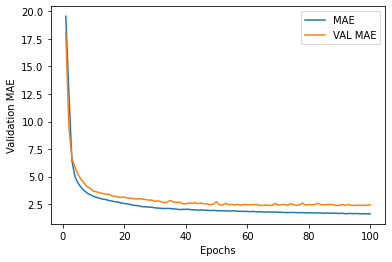

In [ ]:
# LOG RESULTS - Max Average Error on train set and validation set
# MAE of 2.0 means prediction is average 2000$ off from real price

import matplotlib.pyplot as plt

epochs_range = range(1,epochs+1)
plt.plot(epochs_range, history.history["mae"], label="MAE")
plt.plot(epochs_range, history.history["val_mae"], label="VAL MAE")
plt.legend()

plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
# EVALUATION

score = model.evaluate(test_data, test_targets)
print(model.metrics_names)
print(score)  # as example, mae of 2.50 means 2500$ off

4/4 [==============================] - 0s 3ms/step - loss: 20.4339 - mae: 2.7630
['loss', 'mae']
[20.433866500854492, 2.762960433959961]
